In [1]:
from matplotlib import font_manager

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [2]:
from matplotlib import rc

rc('font', family='Arial Unicode MS')

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from networkx.algorithms import bipartite, community
from networkx.algorithms.community import modularity
import matplotlib.colors as mcolors
from collections import Counter


Text(0.5, 1.0, '데이터')

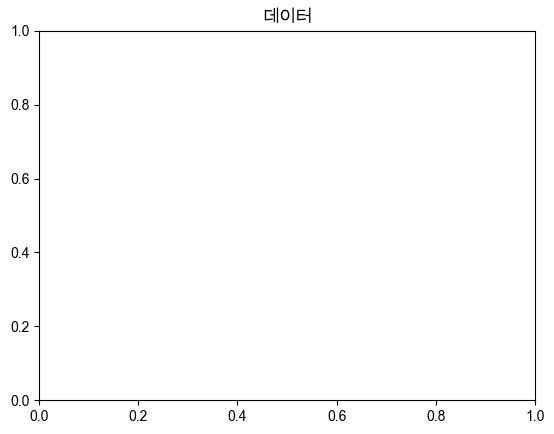

In [4]:
plt.title('데이터')

In [5]:
import pandas as pd

# 파일 읽기
file_path = '../local_data/sample_df.csv'
df = pd.read_csv(file_path)

# 데이터프레임에서 필요한 열만 추출
df['keywords'] = df['keywords'].apply(lambda x: x.strip("[]").split(", "))
df['keywords'] = df['keywords'].apply(lambda x: [k.strip("'") for k in x])


# # 데이터 확인
# print(df.head())


# HITS 알고리즘

In [ ]:

# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(12, 8))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# 커뮤니티 탐색

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(12, 8))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

    # 카테고리 노드들의 projected graph 생성
    category_nodes = set(categories)
    projected_graph = bipartite.projected_graph(B, category_nodes)
    
    # 커뮤니티 탐지
    communities = community.greedy_modularity_communities(projected_graph)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 결과 출력
    print(f"Communities for Trial Index {trial_index}:")
    for i, comm in enumerate(louvain_communities):
        print(f"Community {i + 1}: {', '.join(comm)}")

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# n-th order neighbor 개념으로 탐색

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
n = 8

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # 그래프 그리기
    pos = nx.drawing.layout.bipartite_layout(B, categories)
    plt.figure(figsize=(6, 4))
    nx.draw(B, pos, with_labels=True, 
            node_color=['skyblue' if n in categories else 'lightgreen' for n in B.nodes()],
            font_family='Arial Unicode MS')
    plt.title(f'Bipartite Graph for Trial Index {trial_index}')
    plt.show()

    # Authority 노드 및 Hub 노드 찾기 (HITS 알고리즘 이용)
    hubs, authorities = nx.hits(B)
    top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
    top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]

    print(f"Authorities for Trial Index {trial_index}:")
    for node, score in top_authorities:
        print(f"{node}: {score:.4f}")

    print(f"Hubs for Trial Index {trial_index}:")
    for node, score in top_hubs:
        print(f"{node}: {score:.4f}")

    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산 및 결과 출력
    print(f"Communities for Trial Index {trial_index}:")

    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)
        # comm_modularity = modularity(projected_graph, [comm])

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Modularity': 0.0, #comm_modularity,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density'], x['Modularity']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Modularity={comm['Modularity']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")
        
    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(12, 8))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    nx.draw(projected_graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray',font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()

# 폴리싱 코드

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
n = 8  # n-th order neighbors (짝수로 설정)

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산 및 결과 출력
    print(f"Communities for Trial Index {trial_index}:")

    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(6, 6))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    # 노드 라벨 설정
    # labels = {node: f"{node}\n{authorities[node]:.2f}" for node in projected_graph.nodes()}

    nx.draw(projected_graph, pos, with_labels=True, 
            # labels=labels, 
            node_color=node_colors, node_size=node_sizes, edge_color='gray', font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()

# 필요시 전체 결과를 하나의 DataFrame으로 합쳐서 분석할 수 있습니다.


# 커뮤니티 다이나믹스

In [ ]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {tuple(sorted(comm['Nodes'])): comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 프로젝트 그래프 그리기
    pos = nx.spring_layout(projected_graph)
    plt.figure(figsize=(6, 6))

    # 커뮤니티 별 색상 설정
    colors = list(mcolors.TABLEAU_COLORS.values())
    node_colors = []
    node_sizes = []
    for node in projected_graph.nodes():
        for i, comm in enumerate(sorted_communities):
            if node in comm['Nodes']:
                node_colors.append(colors[i % len(colors)])
                node_sizes.append(comm['Keyword Count'] * 100)  # 커뮤니티에 연결된 키워드 수에 따라 크기 조절

    # 노드 라벨 설정
    labels = {node: f"{node}\n{authorities[node]:.2f}" for node in projected_graph.nodes()}

    nx.draw(projected_graph, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=node_sizes, edge_color='gray', font_family='Arial Unicode MS')
    plt.title(f'Projected Graph for Trial Index {trial_index}')
    plt.show()


# 다이나믹스 변화 관찰

Community 2: Size=2, Density=1.0000, Keyword Count=3, Keyword Ratio=0.3000
Nodes: 13.3. 학자/전문가, 4.9. 반려동물
  13.3. 학자/전문가: Authority=-0.2517, Rank=1
  4.9. 반려동물: Authority=-0.2517, Rank=2
Community 1: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티: Authority=-0.0000, Rank=1
Community 3: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1
Community 4: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 2.5. 중소기업/창업
  2.5. 중소기업/창업: Authority=0.0000, Rank=1

Community Dynamics for Trial Index 1:
New Communities: 22: {('7.2. 방송/드라마', '7.4. 스타/연예인'), ('1.4.2. 무기/방위산업',), ('2.3. 부동산',), ('7.3. 음악',), ('9.2. 칼럼',), ('4.5. 자동차',), ('1.1.1. 청와대/행정부',), ('1.1.2. 국회/입법부',), ('2.6. 경제 정책',), ('4.11. 웨딩/결혼',), ('8.9. 테니스',), ('8.4. 해외 축구',), ('1.1.3. 지방자치', '2.4. 산업/기업', '4.9. 반려동물'), ('6.4. 중동/아프리카',), ('3.4. 환경',), ('4.1. 건강', '5.5. 과학 일반'), ('3.2. 교육',), ('6.1. 아시아/호주

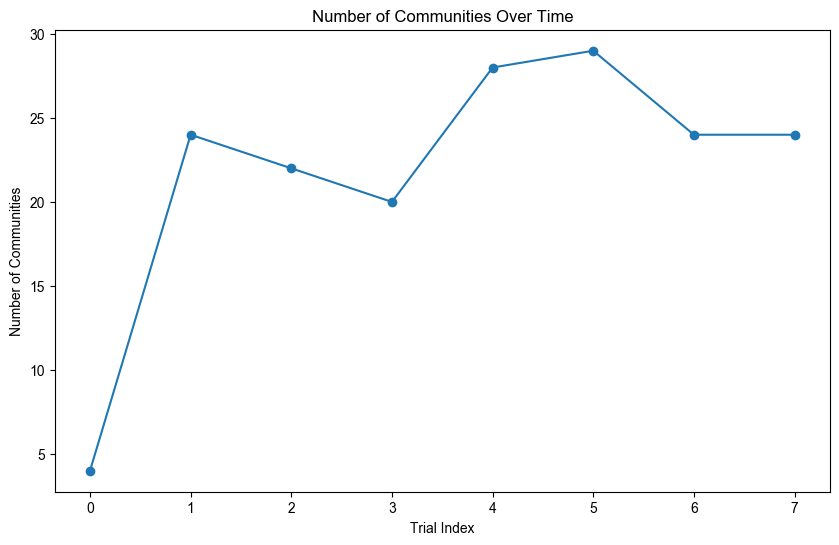

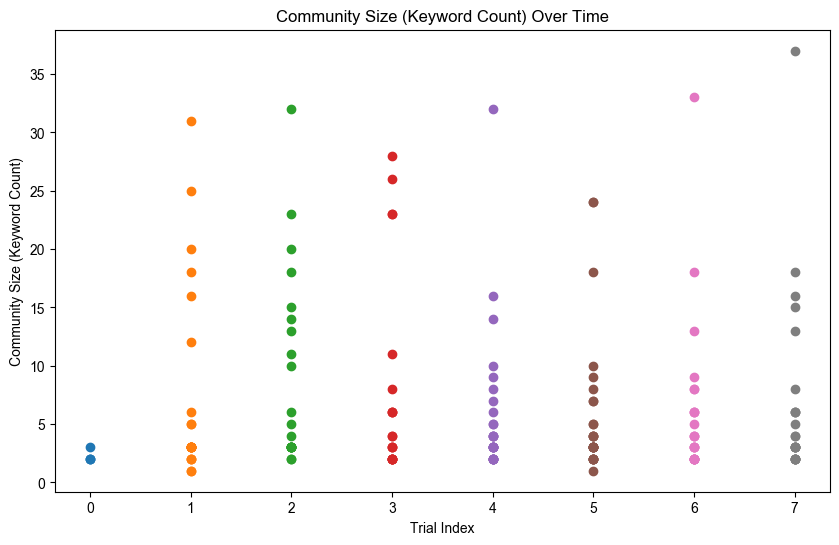

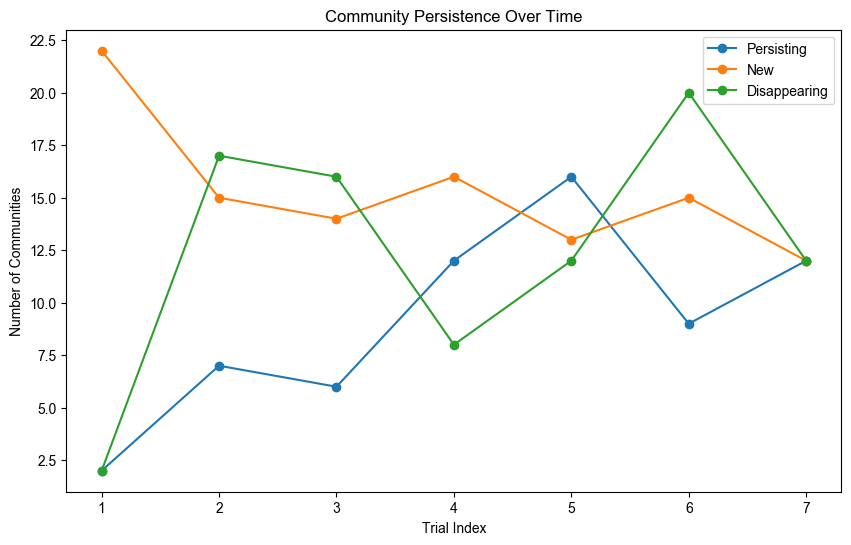


Persisting Categories:
4.2. 요리/맛집: 7
4.3. 패션/뷰티: 6
7.4. 스타/연예인: 5
3.1. 사건사고: 4
4.8. 육아/교육: 3
2.2. 증권/주식: 3
2.3. 부동산: 3
4.4. 여행/레저: 3
3.2. 교육: 2
2.6. 경제 정책: 2
4.1. 건강: 2
1.1.2. 국회/입법부: 2
4.11. 웨딩/결혼: 2
7.6. 셀러브리티/인플루언서: 2
4.10. 취미/DIY: 2
2.1.1. 글로벌 금융시장: 2
3.4. 환경: 1
4.5. 자동차: 1
3.3. 노동: 1
8.4. 해외 축구: 1
5.1. 모바일: 1
5.5. 과학 일반: 1
5.4. IT 기기: 1
5.2. 인터넷/SNS: 1
12.1. 축제/페어: 1
7.2. 방송/드라마: 1
1.4.2. 무기/방위산업: 1
1.1.1. 청와대/행정부: 1
7.3. 음악: 1
4.9. 반려동물: 1

Disappearing Categories:
4.9. 반려동물: 6
2.4. 산업/기업: 6
7.2. 방송/드라마: 4
8.4. 해외 축구: 4
4.1. 건강: 4
1.2.1. 외교/국제관계: 4
2.4.1. 글로벌 기업 동향: 4
1.4.2. 무기/방위산업: 3
7.3. 음악: 3
4.10. 취미/DIY: 3
7.1. 영화: 3
2.5. 중소기업/창업: 2
13.3. 학자/전문가: 2
1.1.2. 국회/입법부: 2
4.11. 웨딩/결혼: 2
1.1.3. 지방자치: 2
5.5. 과학 일반: 2
6.1. 아시아/호주: 2
2.3. 부동산: 2
7.6. 셀러브리티/인플루언서: 2
5.4. IT 기기: 2
3.1. 사건사고: 2
8.3. 국내 축구: 2
5.2. 인터넷/SNS: 2
4.4. 여행/레저: 2
4.5. 자동차: 2
2.6. 경제 정책: 2
2.1.1. 글로벌 금융시장: 2
8.1. 국내 야구: 2
5.6. 우주/항공: 2
3.3. 노동: 2
4.6. 책/문학: 2
1.1.1. 청와대/행정부: 1
7.4. 스타/연예인: 1
8.9. 테니스: 1
6.4. 중동/아

In [6]:
# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

# 커뮤니티 수와 크기를 저장할 리스트
community_counts = []
community_sizes = []
community_persistence = []
community_movement = []

# 카테고리 등장 횟수를 계산할 Counter
persisting_categories_counter = Counter()
disappearing_categories_counter = Counter()
new_categories_counter = Counter()

colors = list(mcolors.TABLEAU_COLORS.values())

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': comm_nodes
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {tuple(sorted(comm['Nodes'])): comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")

        # 커뮤니티 지속성 저장
        community_persistence.append({
            'trial_idx': trial_index,
            'new': len(new_communities),
            'disappearing': len(disappearing_communities),
            'persisting': len(persisting_communities)
        })
        
        # 카테고리 등장 횟수 카운팅
        for comm_nodes in persisting_communities:
            persisting_categories_counter.update(comm_nodes)
        for comm_nodes in new_communities:
            new_categories_counter.update(comm_nodes)
        for comm_nodes in disappearing_communities:
            disappearing_categories_counter.update(comm_nodes)

        # 커뮤니티 이동 저장
        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            prev_center = max(prev_comm['Nodes'], key=lambda node: authorities[node])
            curr_center = max(curr_comm['Nodes'], key=lambda node: authorities[node])
            community_movement.append({
                'trial_idx': trial_index,
                'community': curr_comm['Community'],
                'prev_center': prev_center,
                'curr_center': curr_center
            })

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 커뮤니티 수와 크기 저장
    community_counts.append((trial_index, len(louvain_communities)))
    community_sizes.append((trial_index, [comm['Keyword Count'] for comm in sorted_communities]))

# 커뮤니티 수 시각화
trial_indices, counts = zip(*community_counts)
plt.figure(figsize=(10, 6))
plt.plot(trial_indices, counts, marker='o')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Over Time')
plt.show()

# 커뮤니티 크기 시각화
plt.figure(figsize=(10, 6))
for trial_index, sizes in community_sizes:
    plt.scatter([trial_index] * len(sizes), sizes)
plt.xlabel('Trial Index')
plt.ylabel('Community Size (Keyword Count)')
plt.title('Community Size (Keyword Count) Over Time')
plt.show()

# 커뮤니티 지속성 시각화
persisting_counts = [entry['persisting'] for entry in community_persistence]
new_counts = [entry['new'] for entry in community_persistence]
disappearing_counts = [entry['disappearing'] for entry in community_persistence]
persisting_trial_indices = [entry['trial_idx'] for entry in community_persistence]

plt.figure(figsize=(10, 6))
plt.plot(persisting_trial_indices, persisting_counts, marker='o', label='Persisting')
plt.plot(persisting_trial_indices, new_counts, marker='o', label='New')
plt.plot(persisting_trial_indices, disappearing_counts, marker='o', label='Disappearing')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Community Persistence Over Time')
plt.legend()
plt.show()

# # 커뮤니티 이동 시각화
# movement_df = pd.DataFrame(community_movement)
# if not movement_df.empty:
#     movement_df['color'] = movement_df['community'].apply(lambda x: colors[x % len(colors)])
#     plt.figure(figsize=(10, 6))
#     for community, group in movement_df.groupby('community'):
#         plt.plot(group['trial_idx'], group['prev_center'], marker='o', linestyle='-', label=f'Community {community} Prev', color=group['color'].iloc[0])
#         plt.plot(group['trial_idx'], group['curr_center'], marker='x', linestyle='--', label=f'Community {community} Curr', color=group['color'].iloc[0])
#     plt.xlabel('Trial Index')
#     plt.ylabel('Center Node')
#     plt.title('Community Center Movement Over Time')
#     plt.legend()
#     plt.show()
    
# 카테고리 통계 계산 및 출력
def print_category_stats(counter, title):
    sorted_categories = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    print(f"\n{title}:")
    for category, count in sorted_categories:
        print(f"{category}: {count}")

print_category_stats(persisting_categories_counter, "Persisting Categories")
print_category_stats(disappearing_categories_counter, "Disappearing Categories")
print_category_stats(new_categories_counter, "New Categories")


# 코드 단순화: 필요한 부분만 남김


Community 4: Size=2, Density=1.0000, Keyword Count=3, Keyword Ratio=0.3000
Nodes: 13.3. 학자/전문가, 4.9. 반려동물
  13.3. 학자/전문가: Authority=-0.6547, Rank=1
  4.9. 반려동물: Authority=-0.6547, Rank=2
Community 1: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 2.5. 중소기업/창업
  2.5. 중소기업/창업: Authority=0.0000, Rank=1
Community 2: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.3. 패션/뷰티
  4.3. 패션/뷰티: Authority=-0.0000, Rank=1
Community 3: Size=1, Density=0.0000, Keyword Count=2, Keyword Ratio=0.2000
Nodes: 4.2. 요리/맛집
  4.2. 요리/맛집: Authority=-0.0000, Rank=1

Community Dynamics for Trial Index 1:
New Communities: 22: {('4.11. 웨딩/결혼',), ('4.1. 건강', '5.5. 과학 일반'), ('1.1.3. 지방자치', '2.4. 산업/기업', '4.9. 반려동물'), ('1.1.2. 국회/입법부',), ('6.1. 아시아/호주',), ('7.3. 음악',), ('3.1. 사건사고',), ('8.9. 테니스',), ('7.6. 셀러브리티/인플루언서',), ('(제목이 불충분하여 카테고리 할당 불가)',), ('4.5. 자동차',), ('3.2. 교육',), ('4.10. 취미/DIY',), ('2.6. 경제 정책',), ('1.4.2. 무기/방위산업',), ('3.4. 환경',), ('9.2. 칼럼',), ('1.1.1. 청와대

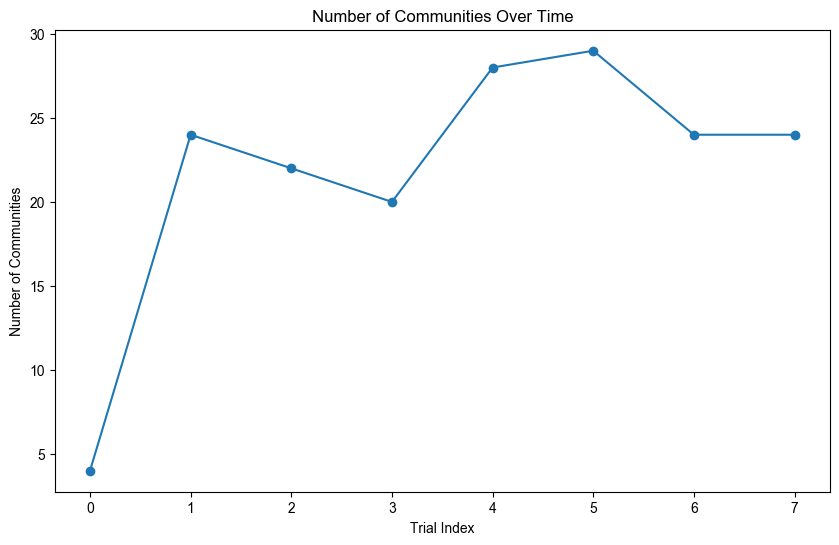

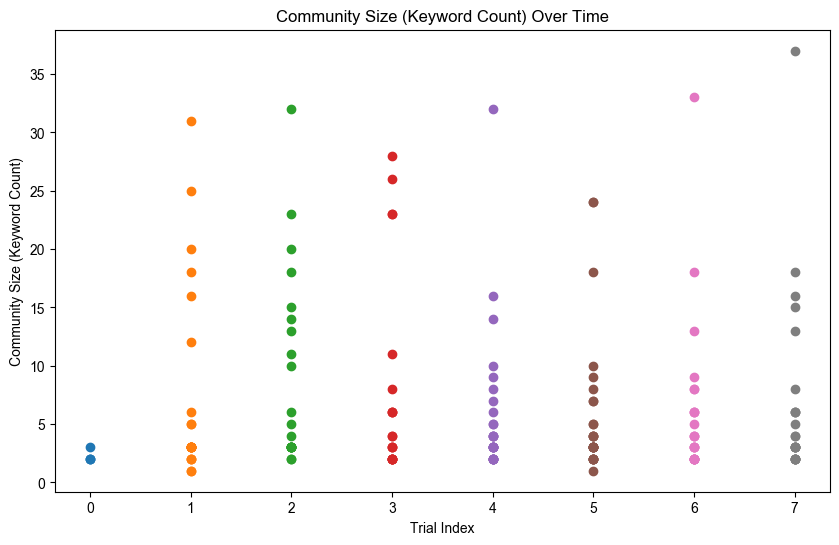

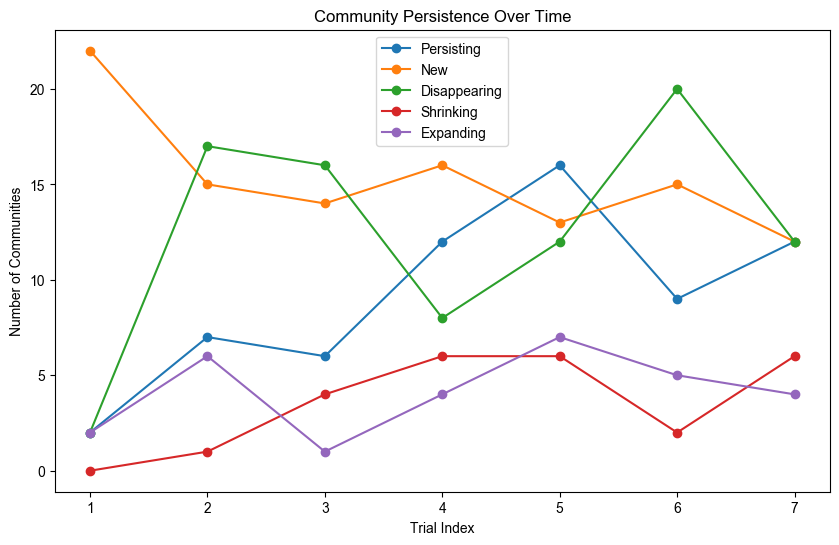

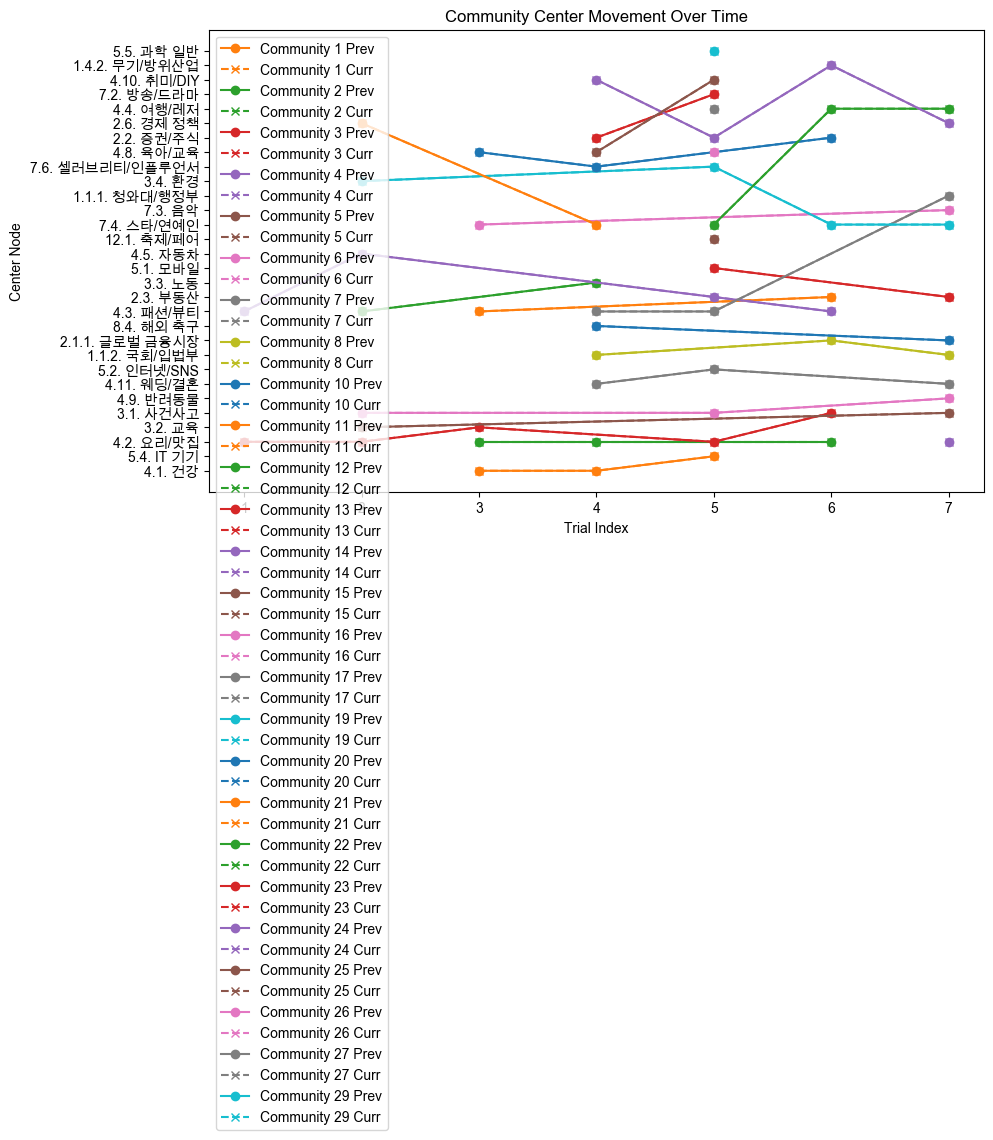


Persisting Communities:
('4.2. 요리/맛집',): 7
('4.3. 패션/뷰티',): 6
('7.4. 스타/연예인',): 5
('3.1. 사건사고',): 4
('4.8. 육아/교육',): 3
('2.2. 증권/주식',): 3
('4.4. 여행/레저',): 3
('2.3. 부동산',): 3
('3.2. 교육',): 2
('2.6. 경제 정책',): 2
('4.1. 건강',): 2
('4.11. 웨딩/결혼',): 2
('1.1.2. 국회/입법부',): 2
('7.6. 셀러브리티/인플루언서',): 2
('4.10. 취미/DIY',): 2
('2.1.1. 글로벌 금융시장',): 2
('3.4. 환경',): 1
('4.5. 자동차',): 1
('3.3. 노동',): 1
('8.4. 해외 축구',): 1
('5.1. 모바일',): 1
('5.4. IT 기기',): 1
('7.2. 방송/드라마',): 1
('5.5. 과학 일반',): 1
('5.2. 인터넷/SNS',): 1
('12.1. 축제/페어',): 1
('1.4.2. 무기/방위산업',): 1
('4.9. 반려동물',): 1
('1.1.1. 청와대/행정부',): 1
('7.3. 음악',): 1

Disappearing Communities:
('8.4. 해외 축구',): 3
('2.5. 중소기업/창업',): 2
('4.11. 웨딩/결혼',): 2
('1.4.2. 무기/방위산업',): 2
('4.10. 취미/DIY',): 2
('1.1.2. 국회/입법부',): 2
('7.3. 음악',): 2
('7.6. 셀러브리티/인플루언서',): 2
('4.9. 반려동물',): 2
('5.2. 인터넷/SNS',): 2
('2.4. 산업/기업',): 2
('5.4. IT 기기',): 2
('7.1. 영화',): 2
('7.2. 방송/드라마',): 2
('4.5. 자동차',): 2
('8.1. 국내 야구',): 2
('5.6. 우주/항공',): 2
('4.6. 책/문학',): 2
('13.3. 학자/전문가', '

In [6]:
colors = list(mcolors.TABLEAU_COLORS.values())

# 날짜별로 데이터프레임 그룹화
grouped = df.groupby('trial_idx')

# 결과 저장을 위한 리스트
graphs = []
community_dynamics = []
n = 8  # n-th order neighbors (짝수로 설정)

previous_communities = {}

# 커뮤니티 수와 크기를 저장할 리스트
community_counts = []
community_sizes = []
community_persistence = []
community_movement = []

# 커뮤니티 등장 횟수를 계산할 Counter
persisting_communities_counter = Counter()
disappearing_communities_counter = Counter()
new_communities_counter = Counter()
shrinking_communities_counter = Counter()
expanding_communities_counter = Counter()

for trial_index, group in grouped:
    B = nx.Graph()
    
    # 카테고리와 키워드를 노드로 추가
    categories = group['category'].unique()
    keywords = sum(group['keywords'].tolist(), [])
    
    B.add_nodes_from(categories, bipartite=0)
    B.add_nodes_from(keywords, bipartite=1)
    
    # 카테고리와 키워드 간의 간선을 추가
    for _, row in group.iterrows():
        category = row['category']
        for keyword in row['keywords']:
            B.add_edge(category, keyword)
    
    graphs.append((trial_index, B))
    
    # HITS 알고리즘을 사용하여 Authority 점수 계산
    hubs, authorities = nx.hits(B)
    sorted_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
    
    # 카테고리 노드들의 n-th order neighbors 기반으로 projected graph 생성
    category_nodes = set(categories)
    projected_graph = nx.Graph()
    projected_graph.add_nodes_from(category_nodes)

    # 모든 카테고리 노드에 대해 n-th order neighbors 찾기
    for category in category_nodes:
        # BFS로 n-th order neighbors 찾기
        lengths = nx.single_source_shortest_path_length(B, category, cutoff=n)
        for target, length in lengths.items():
            if target in category_nodes and category != target:
                if projected_graph.has_edge(category, target):
                    projected_graph[category][target]['weight'] += 1
                else:
                    projected_graph.add_edge(category, target, weight=1)
    
    # 커뮤니티 탐지 (Louvain Method 사용)
    louvain_communities = community.louvain_communities(projected_graph)
    
    # 커뮤니티 중요도 계산
    community_scores = []
    for i, comm in enumerate(louvain_communities):
        comm_nodes = list(comm)
        subgraph = projected_graph.subgraph(comm_nodes)
        size = len(comm_nodes)
        density = nx.density(subgraph)

        # 커뮤니티에 연결된 키워드 수 계산
        connected_keywords = set()
        for category in comm_nodes:
            connected_keywords.update(B.neighbors(category))
        keyword_count = len(connected_keywords)
        keyword_ratio = keyword_count / len(keywords)

        community_scores.append({
            'Community': i + 1,
            'Size': size,
            'Density': density,
            'Keyword Count': keyword_count,
            'Keyword Ratio': keyword_ratio,
            'Nodes': tuple(sorted(comm_nodes))  # 정렬된 튜플로 저장
        })

    # 커뮤니티 다이나믹스 분석
    current_communities = {comm['Nodes']: comm for comm in community_scores}

    if previous_communities:
        new_communities = set(current_communities.keys()) - set(previous_communities.keys())
        disappearing_communities = set(previous_communities.keys()) - set(current_communities.keys())
        persisting_communities = set(previous_communities.keys()) & set(current_communities.keys())

        shrinking_communities = set()
        expanding_communities = set()

        print(f"\nCommunity Dynamics for Trial Index {trial_index}:")
        print(f"New Communities: {len(new_communities)}: {new_communities}")
        print(f"Disappearing Communities: {len(disappearing_communities)}: {disappearing_communities}")
        print(f"Persisting Communities: {len(persisting_communities)}: {persisting_communities}")

        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            change_in_keyword_count = curr_comm['Keyword Count'] - prev_comm['Keyword Count']
            print(f"Community {curr_comm['Community']} persists with keyword count change: {change_in_keyword_count}")
            if change_in_keyword_count > 0:
                expanding_communities.add(comm_nodes)
            elif change_in_keyword_count < 0:
                shrinking_communities.add(comm_nodes)

        # 커뮤니티 지속성 저장
        community_persistence.append({
            'trial_idx': trial_index,
            'new': len(new_communities),
            'disappearing': len(disappearing_communities),
            'persisting': len(persisting_communities),
            'shrinking': len(shrinking_communities),
            'expanding': len(expanding_communities)
        })

        # 커뮤니티 등장 횟수 카운팅
        persisting_communities_counter.update(persisting_communities)
        new_communities_counter.update(new_communities)
        disappearing_communities_counter.update(disappearing_communities)
        shrinking_communities_counter.update(shrinking_communities)
        expanding_communities_counter.update(expanding_communities)

        # 커뮤니티 이동 저장
        for comm_nodes in persisting_communities:
            prev_comm = previous_communities[comm_nodes]
            curr_comm = current_communities[comm_nodes]
            prev_center = max(prev_comm['Nodes'], key=lambda node: authorities[node])
            curr_center = max(curr_comm['Nodes'], key=lambda node: authorities[node])
            community_movement.append({
                'trial_idx': trial_index,
                'community': curr_comm['Community'],
                'prev_center': prev_center,
                'curr_center': curr_center
            })

    previous_communities = current_communities
    
    # 중요도에 따라 정렬하여 출력
    sorted_communities = sorted(community_scores, key=lambda x: (x['Keyword Count'], x['Density']), reverse=True)
    for comm in sorted_communities:
        print(f"Community {comm['Community']}: Size={comm['Size']}, Density={comm['Density']:.4f}, Keyword Count={comm['Keyword Count']}, Keyword Ratio={comm['Keyword Ratio']:.4f}")
        print(f"Nodes: {', '.join(comm['Nodes'])}")

        # Authority 점수 및 랭크 출력
        comm_authorities = [(node, authorities[node]) for node in comm['Nodes']]
        comm_authorities_sorted = sorted(comm_authorities, key=lambda x: x[1], reverse=True)
        for rank, (node, score) in enumerate(comm_authorities_sorted, start=1):
            print(f"  {node}: Authority={score:.4f}, Rank={rank}")

    # 커뮤니티 수와 크기 저장
    community_counts.append((trial_index, len(louvain_communities)))
    community_sizes.append((trial_index, [comm['Keyword Count'] for comm in sorted_communities]))

# 커뮤니티 수 시각화
trial_indices, counts = zip(*community_counts)
plt.figure(figsize=(10, 6))
plt.plot(trial_indices, counts, marker='o')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Number of Communities Over Time')
plt.show()

# 커뮤니티 크기 시각화
plt.figure(figsize=(10, 6))
for trial_index, sizes in community_sizes:
    plt.scatter([trial_index] * len(sizes), sizes)
plt.xlabel('Trial Index')
plt.ylabel('Community Size (Keyword Count)')
plt.title('Community Size (Keyword Count) Over Time')
plt.show()

# 커뮤니티 지속성 시각화
persisting_counts = [entry['persisting'] for entry in community_persistence]
new_counts = [entry['new'] for entry in community_persistence]
disappearing_counts = [entry['disappearing'] for entry in community_persistence]
shrinking_counts = [entry['shrinking'] for entry in community_persistence]
expanding_counts = [entry['expanding'] for entry in community_persistence]
persisting_trial_indices = [entry['trial_idx'] for entry in community_persistence]

plt.figure(figsize=(10, 6))
plt.plot(persisting_trial_indices, persisting_counts, marker='o', label='Persisting')
plt.plot(persisting_trial_indices, new_counts, marker='o', label='New')
plt.plot(persisting_trial_indices, disappearing_counts, marker='o', label='Disappearing')
plt.plot(persisting_trial_indices, shrinking_counts, marker='o', label='Shrinking')
plt.plot(persisting_trial_indices, expanding_counts, marker='o', label='Expanding')
plt.xlabel('Trial Index')
plt.ylabel('Number of Communities')
plt.title('Community Persistence Over Time')
plt.legend()
plt.show()

# 커뮤니티 이동 시각화
movement_df = pd.DataFrame(community_movement)
if not movement_df.empty:
    movement_df['color'] = movement_df['community'].apply(lambda x: colors[x % len(colors)])
    plt.figure(figsize=(10, 6))
    for community, group in movement_df.groupby('community'):
        plt.plot(group['trial_idx'], group['prev_center'], marker='o', linestyle='-', label=f'Community {community} Prev', color=group['color'].iloc[0])
        plt.plot(group['trial_idx'], group['curr_center'], marker='x', linestyle='--', label=f'Community {community} Curr', color=group['color'].iloc[0])
    plt.xlabel('Trial Index')
    plt.ylabel('Center Node')
    plt.title('Community Center Movement Over Time')
    plt.legend()
    plt.show()

# 카테고리 통계 계산 및 출력
def print_category_stats(counter, title):
    sorted_categories = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    print(f"\n{title}:")
    for categories, count in sorted_categories:
        print(f"{categories}: {count}")

print_category_stats(persisting_communities_counter, "Persisting Communities")
print_category_stats(disappearing_communities_counter, "Disappearing Communities")
print_category_stats(new_communities_counter, "New Communities")
print_category_stats(shrinking_communities_counter, "Shrinking Communities")
print_category_stats(expanding_communities_counter, "Expanding Communities")


In [12]:
persisting_categories_counter

Counter({'4.3. 패션/뷰티': 6,
         '4.2. 요리/맛집': 7,
         '3.4. 환경': 1,
         '3.2. 교육': 2,
         '3.1. 사건사고': 4,
         '4.5. 자동차': 1,
         '2.6. 경제 정책': 2,
         '4.1. 건강': 2,
         '4.8. 육아/교육': 3,
         '7.4. 스타/연예인': 5,
         '1.1.2. 국회/입법부': 2,
         '3.3. 노동': 1,
         '4.11. 웨딩/결혼': 2,
         '8.4. 해외 축구': 1,
         '2.2. 증권/주식': 3,
         '7.6. 셀러브리티/인플루언서': 2,
         '4.10. 취미/DIY': 2,
         '5.1. 모바일': 1,
         '5.5. 과학 일반': 1,
         '5.4. IT 기기': 1,
         '2.3. 부동산': 3,
         '5.2. 인터넷/SNS': 1,
         '12.1. 축제/페어': 1,
         '4.4. 여행/레저': 3,
         '7.2. 방송/드라마': 1,
         '2.1.1. 글로벌 금융시장': 2,
         '1.4.2. 무기/방위산업': 1,
         '1.1.1. 청와대/행정부': 1,
         '7.3. 음악': 1,
         '4.9. 반려동물': 1})

In [14]:
persisting_communities

{('4.2. 요리/맛집',), ('4.3. 패션/뷰티',)}

In [18]:
for comm_nodes in disappearing_communities:
    print(comm_nodes)
    # persisting_categories_counter.update(comm_nodes)

('2.5. 중소기업/창업',)
('13.3. 학자/전문가', '4.9. 반려동물')


In [16]:
disappearing_categories_counter

Counter({'2.5. 중소기업/창업': 1, '13.3. 학자/전문가': 1, '4.9. 반려동물': 1})

In [19]:
disappearing_categories_counter

Counter({'2.5. 중소기업/창업': 1, '13.3. 학자/전문가': 1, '4.9. 반려동물': 1})

In [8]:
[(node, authorities[node]) for node in comm['Nodes']]

[('12.1. 축제/페어', -4.867896033830777e-21)]

In [9]:
authorities

{'7.4. 스타/연예인': 2.2896189243713926e-16,
 '4.1. 건강': -0.9785084062929339,
 '4.10. 취미/DIY': 4.5488392418127135e-17,
 '2.4. 산업/기업': -1.497008022719025e-16,
 '4.2. 요리/맛집': 5.446107495916987e-17,
 '2.1.1. 글로벌 금융시장': -2.423813236468784e-18,
 '4.9. 반려동물': 8.327385565019399e-17,
 '4.11. 웨딩/결혼': 2.8646368163258315e-20,
 '1.1.2. 국회/입법부': 2.057753400884349e-19,
 '1.1.1. 청와대/행정부': 3.0499728917213747e-18,
 '1.2.1. 외교/국제관계': -2.0037472981244138e-19,
 '7.2. 방송/드라마': -2.56001649031418e-18,
 '2.6. 경제 정책': 3.888176976619651e-18,
 '4.4. 여행/레저': -2.73641685067523e-17,
 '2.3. 부동산': -6.04652365971941e-20,
 '12.2. 전시/공연': -5.611599270371045e-20,
 '7.3. 음악': -2.2262594970789292e-17,
 '6.1. 아시아/호주': -1.1499879357285855e-18,
 '3.1. 사건사고': -9.532185802857696e-20,
 '12.1. 축제/페어': -4.867896033830777e-21,
 '5.4. IT 기기': 7.798330194850188e-18,
 '3.1.1. 국제 사건사고': -4.431404616403763e-19,
 '5.2. 인터넷/SNS': -2.6113825411018012e-18,
 '8.3. 국내 축구': 4.429568509324705e-19,
 '박재범': 3.636677718697538e-17,
 '캘빈클라인': 3.933989990